<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Programming for Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 5</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td> 22127008 </td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td> 22127170 </td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">COVID - 19 ANALYSIS - DATA ANALYSIS</div>
</div>

# **Table of Contents**

1. [**Import necessary packages**](#import)

2. [**Load data**](#load)

3. [**Preprocessing**](#preprocessing)

4. [**Analysis**](#analysis)
    - [Question 1](#q1)
    - [Question 2](#q2)
    - [Question 3](#q3)
    - [Question 4](#q4)
    - [Question 5](#q5)
    - [Question 6](#q6)

# **Data Analysis**
<a id="import"></a>
## **Import necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load"></a>
## **Load data**
Read cleaned data from last section
- Read the data from the file `covid_19.csv` and display the 5 rows of the data.

In [2]:
# covid_19.csv
covid_19_df = pd.read_csv("./cleaned_data/covid_19.csv")
covid_19_df.sample(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
3887,Timor-Leste,-8.874217,125.727539,2020-02-05,0,0,0,0,South-East Asia
41765,Antigua and Barbuda,17.060800,-61.796400,2020-06-30,69,3,22,44,Americas
30525,Burundi,-3.373100,29.918900,2020-05-17,23,1,15,7,Africa
3611,United Kingdom,36.140800,-5.353600,2020-02-04,0,0,0,0,Europe
17540,China,23.341700,113.424400,2020-03-29,1475,8,1349,118,Western Pacific


Read cleaned data from last section
- Read the data from the file `lastest.csv` and display the 5 rows of the data.

In [3]:
# lastest.csv
world_df = pd.read_csv("./cleaned_data/latest.csv")
world_df.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
33,Dominican Republic,North America,10858648.0,76536,1246.0,40539.0,34751.0,317.0,7048.0,115.0,281926.0,25963.0,Americas
94,Albania,Europe,2877470.0,6016,188.0,3155.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
134,Angola,Africa,32956300.0,1483,64.0,520.0,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa
181,Brunei,Asia,437893.0,141,3.0,138.0,0.0,0.0,322.0,7.0,41148.0,93968.0,0
129,Iceland,Europe,341465.0,1930,10.0,1825.0,95.0,0.0,5652.0,29.0,149693.0,438385.0,Europe


<a id="preprocessing"></a>
## **Preprocessing**

### **What are total number of Confirmed, Deaths, Recovered and Active cases around the world?** 
- Answer this question indicating the total number of confirmed, deaths, recovered and active cases around the world.
- Answer this question by finding out the total number of confirmed, deaths, recovered and active cases of all countries in `worldometer_data` and plot them using bar chart.

In [4]:
total_confirmed = world_df['TotalCases'].sum()
total_deaths = world_df['TotalDeaths'].sum()
total_recovered = world_df['TotalRecovered'].sum()
total_active = world_df['ActiveCases'].sum()

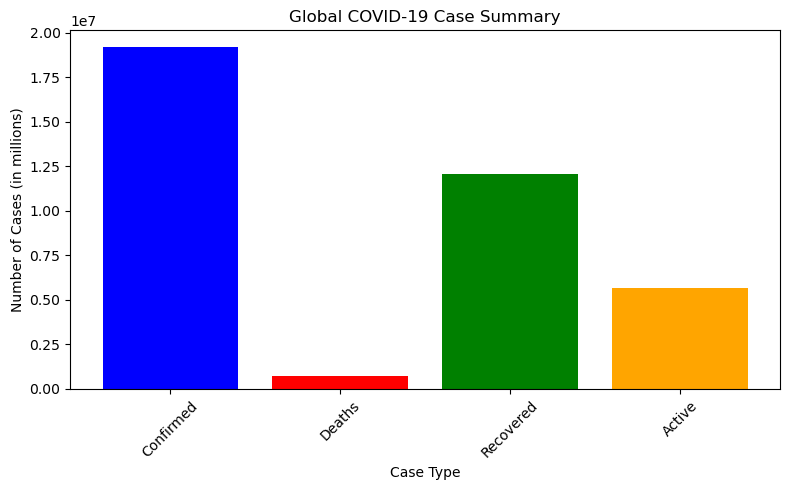

{'Confirmed': 19169166,
 'Deaths': 713007.0,
 'Recovered': 12070191.0,
 'Active': 5671187.0}

In [5]:
totals = {
    "Confirmed": total_confirmed,
    "Deaths": total_deaths,
    "Recovered": total_recovered,
    "Active": total_active
}

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(totals.keys(), totals.values(), color=['blue', 'red', 'green', 'orange'])
plt.title("Global COVID-19 Case Summary")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("Case Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totals

### **The correlation between population, death cases, recovered case, active case and critical, serious case. Give insights into the relationship between the number of cases and deaths with the population of the country.** 
- By answering this question, it helps us to understand the relationship between the population and total death cases, total recovered cases, total actived cases and critial, serious case. This information is useful for the to gain insigns about any feature affect the number of cases in that country.
- Answer this question by calculating the correlation matrix between population, cases and deaths. Then, we will plot the correlation matrix using a heatmap.

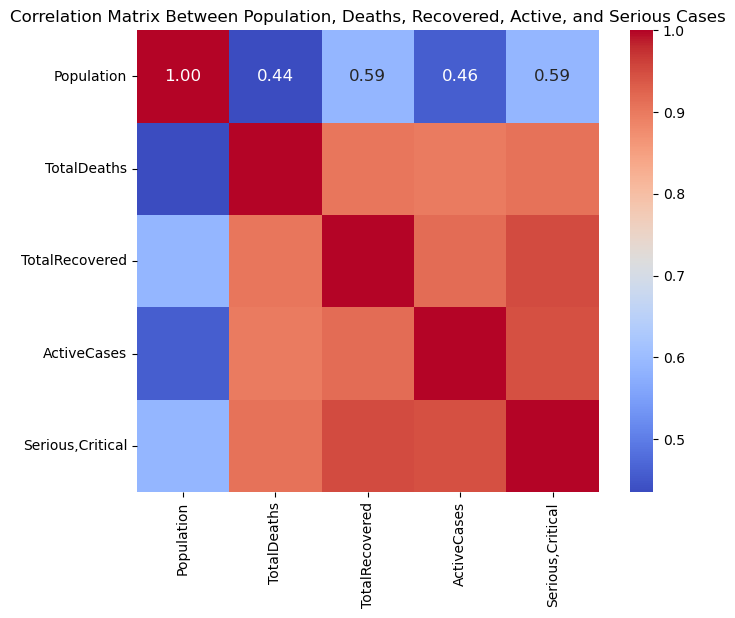

,Population,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical"
Population,1.000000,0.435269,0.589550,0.458732,0.588562
TotalDeaths,0.435269,1.000000,0.903282,0.897461,0.909095
TotalRecovered,0.589550,0.903282,1.000000,0.914581,0.949477
ActiveCases,0.458732,0.897461,0.914581,1.000000,0.944925
"Serious,Critical",0.588562,0.909095,0.949477,0.944925,1.000000


In [18]:
correlation_data = world_df[["Population", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical"]]
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Population, Deaths, Recovered, Active, and Serious Cases")
plt.show()

correlation_matrix


### **What are the top 10 countries with the lowest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the lowest number of case (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the least affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in ascending order. Then, we will display the top 10 countries with the lowest number of deaths, recovered, and active cases.



### **What are the top 10 countries with the highest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the highest number of cases (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the most affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in descending order. Then, we will display the top 10 countries with the highest number of deaths, recovered, and active cases.


<a id="analysis"></a>
## **Analysis**
<a id="q1"></a>

<a id="q2"></a>
### **Question 1.** Does the global trend over time for Confirmed/Deaths/Recovered cases evolve over time?
- Answer this question indicates the trend of the number of confirmed, deaths, and recovered cases over time: when it peaks, when it decreases, and when it increases in the time series.
- To answer this question, we will group `clean_complete_data` by `Date` and sum the values of `Confirmed`, `Deaths`, and `Recovered` columns. Then, we will plot the global trend over time for confirmed, deaths, and recovered cases using line charts.

In [4]:
# Find total confirmed/deaths/recovered/acive cases per day
total_per_day = covid_19_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
total_per_day.to_csv(r"cleaned_data/total_per_day.csv", index=False)
total_per_day.sample(5)

,Date,Confirmed,Deaths,Recovered,Active
177,2020-07-17,14054563,596503,7793760,5664300
60,2020-03-22,341585,14831,95990,230764
175,2020-07-15,13559984,583961,7482320,5493703
125,2020-05-26,5597064,351906,2235118,3010040
145,2020-06-15,8043794,437549,3793406,3812839


<a id="q6"></a>
### **Question 2.** What is the level of epidemic control in the 10 most populous countries?

<a id="q6"></a>
### **Question 3.** Status recorded cases of COVID - 19 with the world of countries during the period